## Graphs Isomorphism Analysis

In [1]:
from graph_iso.graph import Graph
from graph_iso.isomorphism import IsomorphismChecker
from graph_iso.parser import GraphParser

import math
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

In [2]:
graphs = GraphParser("../data/sample_graphs.json").load_multiple_graphs()
graph1 = graphs["graph1"]
graph2 = graphs["graph2"]

In [6]:
def compute_positions(graph, radius=1.0):
    nodes = sorted(graph.get_nodes())
    if not nodes:
        return {}

    angle_step = (2 * math.pi) / len(nodes)
    return {
        node: (
            math.cos(index * angle_step) * radius,
            math.sin(index * angle_step) * radius,
        )
        for index, node in enumerate(nodes)
    }


def draw_graph(ax, graph, positions, color_fn, title):
    if not positions:
        ax.set_title(f"{title} (no nodes)")
        ax.axis("off")
        return

    drawn_edges = set()
    for u in graph.get_nodes():
        for v in graph.get_neighbors(u):
            edge = tuple(sorted((u, v)))
            if edge in drawn_edges:
                continue
            drawn_edges.add(edge)
            x_vals = [positions[u][0], positions[v][0]]
            y_vals = [positions[u][1], positions[v][1]]
            ax.plot(x_vals, y_vals, color="#90a4ae", linewidth=1.6, zorder=1)

    for node, (x_coord, y_coord) in positions.items():
        ax.scatter(
            x_coord,
            y_coord,
            s=700,
            color=color_fn(node),
            edgecolors="#263238",
            linewidth=1.5,
            zorder=2,
        )
        ax.text(
            x_coord,
            y_coord,
            str(node),
            ha="center",
            va="center",
            color="#212121",
            weight="bold",
            zorder=3,
        )

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.axis("off")


def visualize_isomorphism_process(graph1, graph2, trace_states):
    if not trace_states:
        print("No trace data available for visualization.")
        return

    positions_g1 = compute_positions(graph1)
    positions_g2 = compute_positions(graph2)

    print("Use Enter to advance through each recorded step of the solver.")
    for idx, state in enumerate(trace_states):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        mapping = state.get("mapping", {})
        current_node = state.get("current_node")
        candidate = state.get("candidate")
        rejected = set(state.get("rejected_candidates") or [])
        visited_g1 = set(mapping.keys())
        visited_g2 = set(mapping.values())

        def color_graph1(node):
            if node == current_node:
                return "#ffb74d"
            if node in visited_g1:
                return "#66bb6a"
            return "#90caf9"

        def color_graph2(node):
            if node == candidate:
                return "#ab47bc"
            if node in rejected:
                return "#ef5350"
            if node in visited_g2:
                return "#66bb6a"
            return "#90caf9"

        draw_graph(axes[0], graph1, positions_g1, color_graph1, "Graph 1")
        draw_graph(axes[1], graph2, positions_g2, color_graph2, "Graph 2")

        fig.suptitle(
            f"Step {state['step']}: {state['event'].replace('_', ' ').title()}",
            fontsize=14,
            fontweight="bold",
        )
        display(fig)
        plt.close(fig)

        print(state.get("message") or "")
        print(f"Current mapping: {mapping}")

        if idx < len(trace_states) - 1:
            input("Press Enter for the next step...")
            clear_output(wait=True)
        else:
            print("Visualization complete.")

In [4]:
checker = IsomorphismChecker(graph1=graph1, graph2=graph2)
result, trace_states = checker.trace_states()
print(f"Are graphs isomorphic? {result}")
print(f"Recorded {len(trace_states)} tracing steps.")

Are graphs isomorphic? True
Recorded 13 tracing steps.


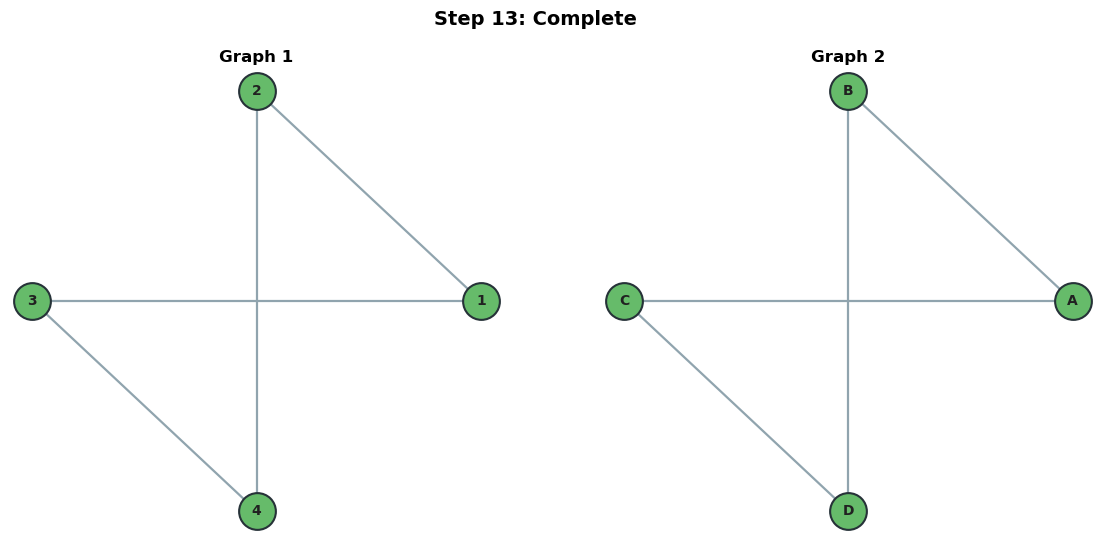

Isomorphism found. All nodes mapped successfully.
Current mapping: {1: 'A', 2: 'B', 3: 'C', 4: 'D'}
Visualization complete.


In [5]:
visualize_isomorphism_process(graph1, graph2, trace_states)